In [1]:
# Dependencies
import gmaps
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import pearsonr

In [2]:
# Read main CSV data file
accidents_df = pd.read_csv("all.csv", low_memory=False)

# Print the columns list to see available columns
print(accidents_df.columns)

# Get an overview of the DataFrame
accidents_df

Index(['Unnamed: 0', 'Accident_Index', '1st_Road_Class', 'Accident_Severity',
       'Year', 'Date', 'Day_of_Week', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Longitude', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Road_Surface_Conditions', 'Road_Type',
       'Special_Conditions_at_Site', 'Speed_limit', 'Time',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Age_Band_of_Driver',
       'Age_of_Vehicle', 'Engine_Capacity_.CC.', 'Journey_Purpose_of_Driver',
       'Junction_Location', 'make', 'model', 'Propulsion_Code',
       'Sex_of_Driver', 'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Type', 'Was_Vehicle_Left_Hand_Drive'],
      dtype='object')


,Unnamed: 0,Accident_Index,1st_Road_Class,Accident_Severity,Year,Date,Day_of_Week,Latitude,Light_Conditions,Local_Authority_(District),...,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Type,Was_Vehicle_Left_Hand_Drive
0,478587,201001BS70003,B,Slight,2010,2010-01-11,Monday,51.484087,Daylight,Kensington and Chelsea,...,Commuting to/from work,Mid Junction - on roundabout or on main road,CITROEN,BERLINGO FIRST 600,Petrol,Female,No tow/articulation,Turning right,Van / Goods 3.5 tonnes mgw or under,No
1,478588,201001BS70004,A,Slight,2010,2010-01-11,Monday,51.509212,Darkness - lights lit,Kensington and Chelsea,...,Journey as part of work,Mid Junction - on roundabout or on main road,RENAULT,SCENIC DYN DCI 130,Heavy oil,Male,No tow/articulation,Going ahead other,Car,No
2,478589,201001BS70007,Unclassified,Slight,2010,2010-01-02,Saturday,51.513314,Darkness - lights lit,Kensington and Chelsea,...,Other/Not known (2005-10),Mid Junction - on roundabout or on main road,NISSAN,PRIMERA SVE CVT,Petrol,Female,No tow/articulation,Going ahead right-hand bend,Car,No
3,478590,201001BS70007,Unclassified,Slight,2010,2010-01-02,Saturday,51.513314,Darkness - lights lit,Kensington and Chelsea,...,Other/Not known (2005-10),Mid Junction - on roundabout or on main road,MERCEDES,A140 ELEGANCE,Petrol,Female,No tow/articulation,Going ahead other,Car,No
4,478591,201001BS70008,A,Slight,2010,2010-01-04,Monday,51.484361,Darkness - lights lit,Kensington and Chelsea,...,Journey as part of work,Mid Junction - on roundabout or on main road,VAUXHALL,ZAFIRA ELEGANCE DTI,Heavy oil,Male,No tow/articulation,Turning right,Taxi/Private hire car,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077648,1556235,2016984130916,B,Slight,2016,2016-10-28,Friday,55.058998,Darkness - lights lit,Dumfries and Galloway,...,Commuting to/from work,Cleared junction or waiting/parked at junction...,SEAT,IBIZA ECOMOTIVE TDI,Heavy oil,Female,No tow/articulation,Going ahead other,Car,No
1077649,1556236,2016984130916,B,Slight,2016,2016-10-28,Friday,55.058998,Darkness - lights lit,Dumfries and Galloway,...,Data missing or out of range,Cleared junction or waiting/parked at junction...,RENAULT,MEGANE DYNAMIQUE 16V,Petrol,Not known,No tow/articulation,Parked,Car,No
1077650,1556237,2016984131116,B,Slight,2016,2016-11-01,Tuesday,55.005033,Daylight,Dumfries and Galloway,...,Not known,Mid Junction - on roundabout or on main road,MINI,MINI COOPER,Petrol,Female,No tow/articulation,Going ahead other,Car,No
1077651,1556238,2016984131316,B,Slight,2016,2016-10-29,Saturday,54.989597,Darkness - lights lit,Dumfries and Galloway,...,Not known,Not at or within 20 metres of junction,VAUXHALL,VECTRA SXI 16V,Petrol,Male,No tow/articulation,Going ahead other,Car,No


I have imported the cleaned data from the CSV file where it was stored.

Text(0.5, 0, 'Road Class')

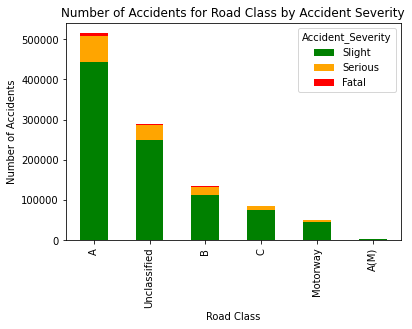

In [3]:
class_group = accidents_df.groupby(["1st_Road_Class","Accident_Severity"])

class_group_count = class_group["Accident_Severity"].count().unstack()

class_group_count = class_group_count.sort_values(by=["Fatal","Serious","Slight"], ascending=False)

class_group_count = class_group_count[["Slight","Serious","Fatal"]]

class_group_count.plot.bar(stacked=True, color={"Fatal": "red", "Serious": "orange", "Slight":"green"})

plt.title("Number of Accidents for Road Class by Accident Severity")
plt.ylabel("Number of Accidents")
plt.xlabel("Road Class")

Plot appears to indicate the overwhelming majority of accidents take place on A Roads and have a severity rating of slight. The A road also have the most number Fatal accidents. This appears to be an indication that travelling on A roads puts you at the greatest chance of being involved in accident.

Text(0.5, 0, 'Road Type')

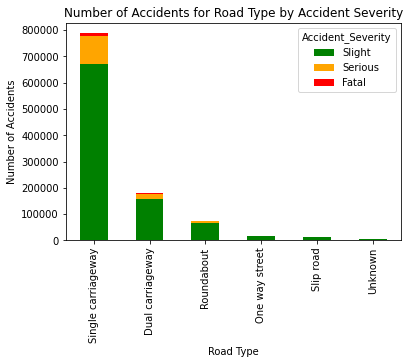

In [4]:
road_group = accidents_df.groupby(["Road_Type","Accident_Severity"])

road_group_count = road_group["Accident_Severity"].count().unstack()

road_group_count = road_group_count.sort_values(by=["Fatal","Serious","Slight"], ascending=False)

road_group_count = road_group_count[["Slight","Serious","Fatal"]]

road_group_count.plot.bar(stacked=True, color={"Fatal": "red", "Serious": "orange", "Slight":"green"})

plt.title("Number of Accidents for Road Type by Accident Severity")
plt.ylabel("Number of Accidents")
plt.xlabel("Road Type")

This plot indicates that an overwhelming majority of accidents of all severity ratings happen on Single Carriageways. This is followed by Dual Carriageways.

In [38]:
#attempting some statistical analysis

# print(road_group_count_df)
# print(road_group_count)
# print(road_group_count.describe())

# q1 = road_group_count.quantile(0.25)
# q3 = road_group_count.quantile(0.75)
# iqr = q3 - q1
# print(iqr)


# #print(road_group_count < (q1 - 1.5 * iqr)) | (road_group_count > (q3 + 1.5 * iqr))